In [1]:
library(astsa) 
library(readxl)
library(tidyverse)
library(ggplot2)
library(dplyr)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──
✔ ggplot2 3.3.0     ✔ purrr   0.3.3
✔ tibble  3.0.0     ✔ dplyr   0.8.5
✔ tidyr   1.0.2     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


### Time Series Analysis

In [2]:
dataset <- data.frame(read_excel("covid_dataset.xlsx"))

In [3]:
names(dataset)

[1] "Date"                                       
 [2] "Daily.Confirmed"                            
 [3] "False.Positives.Found"                      
 [4] "Cumulative.Confirmed"                       
 [5] "Daily.Discharged"                           
 [6] "Passed.but.not.due.to.COVID"                
 [7] "Cumulative.Discharged"                      
 [8] "Discharged.to.Isolation"                    
 [9] "Still.Hospitalised"                         
[10] "Daily.Deaths"                               
[11] "Cumulative.Deaths"                          
[12] "Tested.positive.demise"                     
[13] "Daily.Imported"                             
[14] "Daily.Local.transmission"                   
[15] "Local.cases.residing.in.dorms.MOH.report"   
[16] "Local.cases.not.residing.in.doms.MOH.report"
[17] "Intensive.Care.Unit..ICU."                  
[18] "General.Wards.MOH.report"                   
[19] "In.Isolation.MOH.report"                    
[20] "Total.Completed.Isolation.MOH.report"       
[21] "Total.Hospital.Discharged.MOH.report"

In [4]:
confirmed <- dataset %>% select(c('Date', 'Daily.Confirmed'))

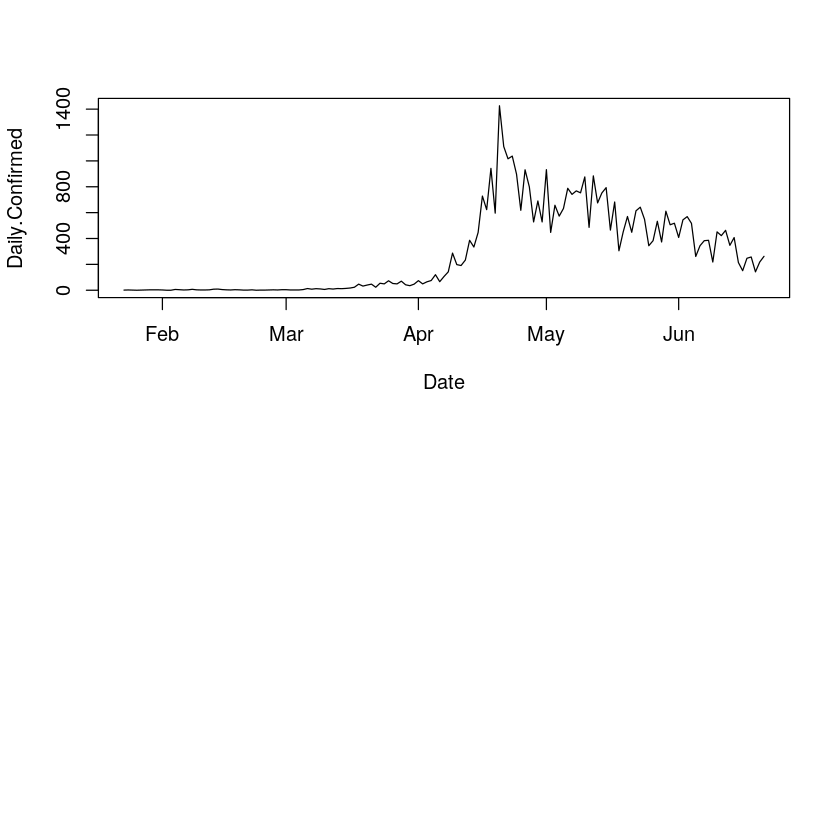

In [5]:
par(mfrow=c(2,1))
plot(confirmed, type="l")

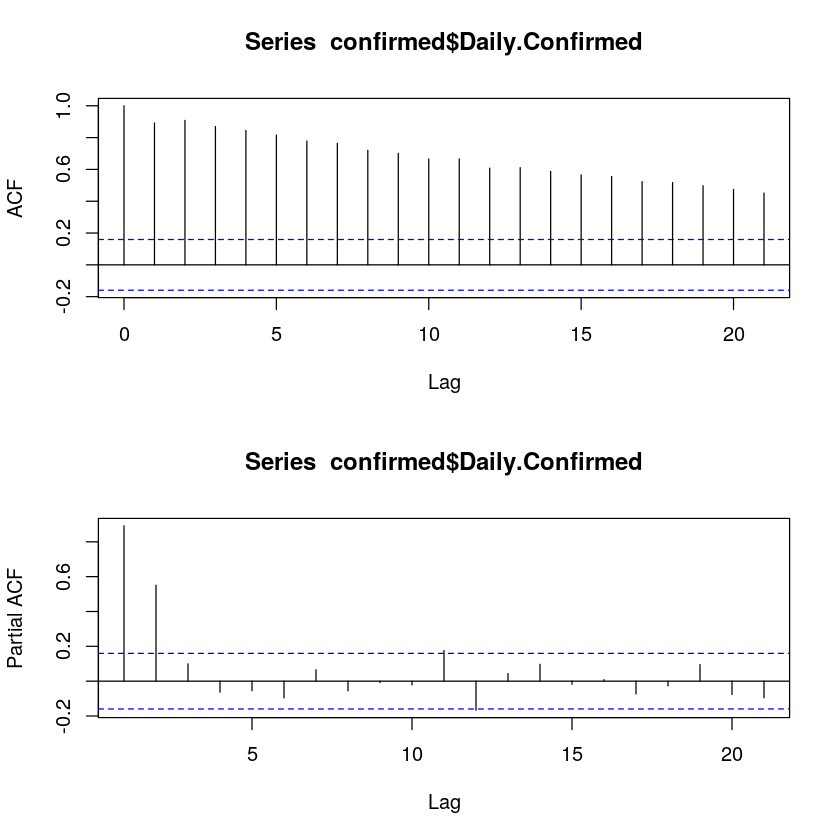

In [6]:
par(mfrow=c(2,1))
acf(confirmed$Daily.Confirmed)
pacf(confirmed$Daily.Confirmed)

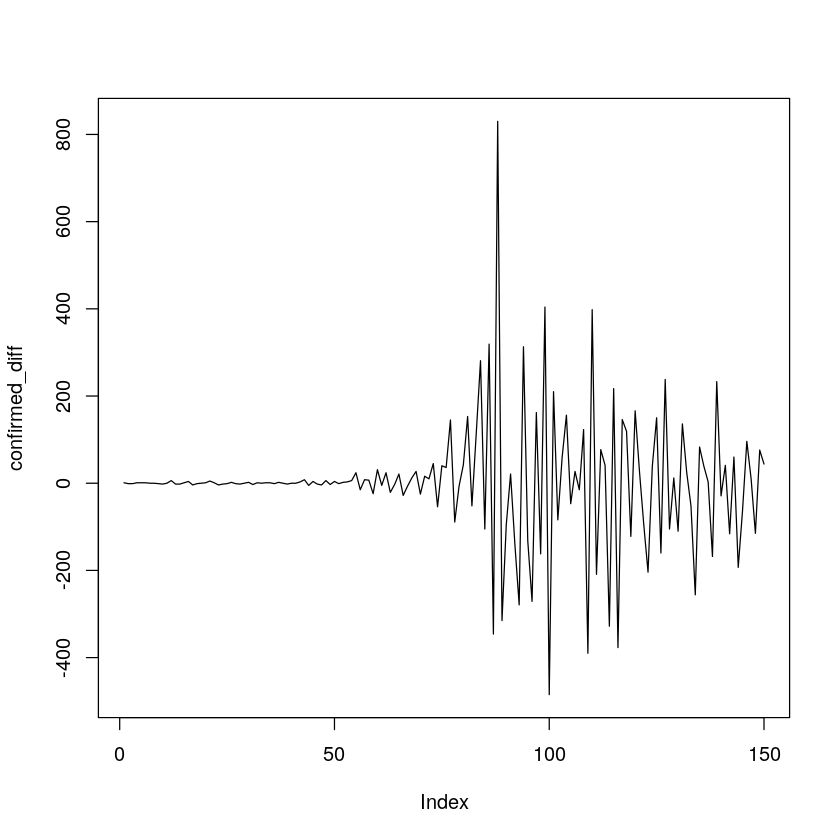

ACF,-0.59,0.26,-0.07,0.02,0.04,-0.11,0.15,-0.12,0.08,-0.17,...,-0.01,-0.06,0.11,-0.13,0.07,0.01,0.00,-0.05,0.15,-0.11
PACF,-0.59,-0.13,0.05,0.04,0.09,-0.08,0.04,-0.01,0.00,-0.20,...,0.00,-0.02,0.06,0.02,-0.11,0.06,0.09,-0.04,0.08,0.08


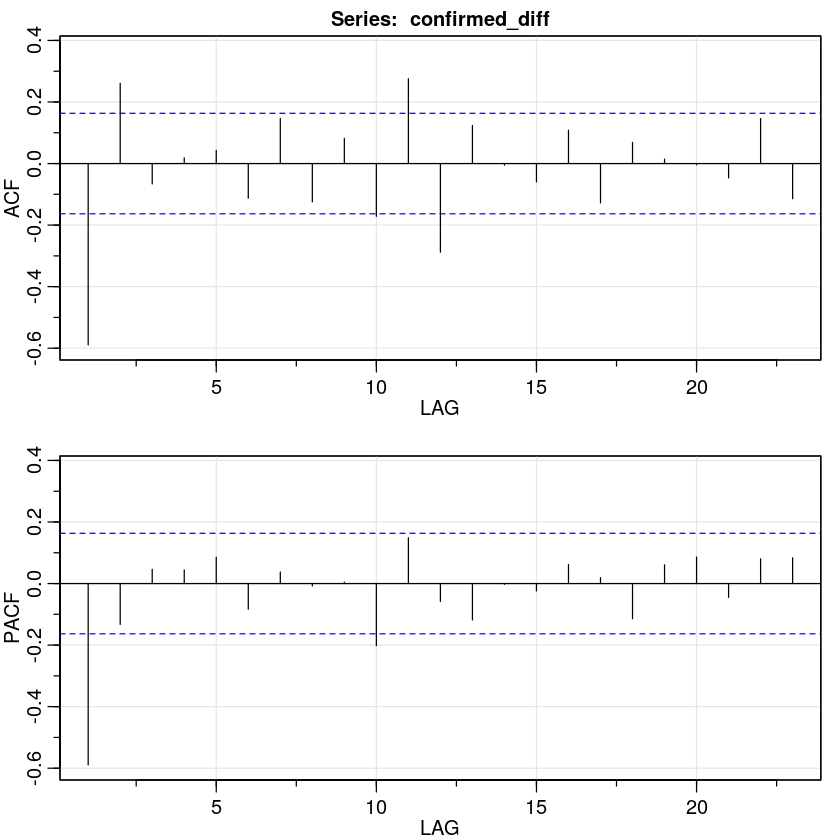

In [7]:
confirmed_diff <- diff(confirmed$Daily.Confirmed)
plot(confirmed_diff, type='l')
acf2(confirmed_diff)

In [8]:
ar1<-arima(confirmed_diff ,order=c(1,0,0))
ar2<-arima(confirmed_diff ,order=c(2,0,0))
ar10<-arima(confirmed_diff ,order=c(10,0,0))
ma2<-arima(confirmed_diff ,order=c(0,0,2))
ma12<-arima(confirmed_diff, order=c(0,0,12))

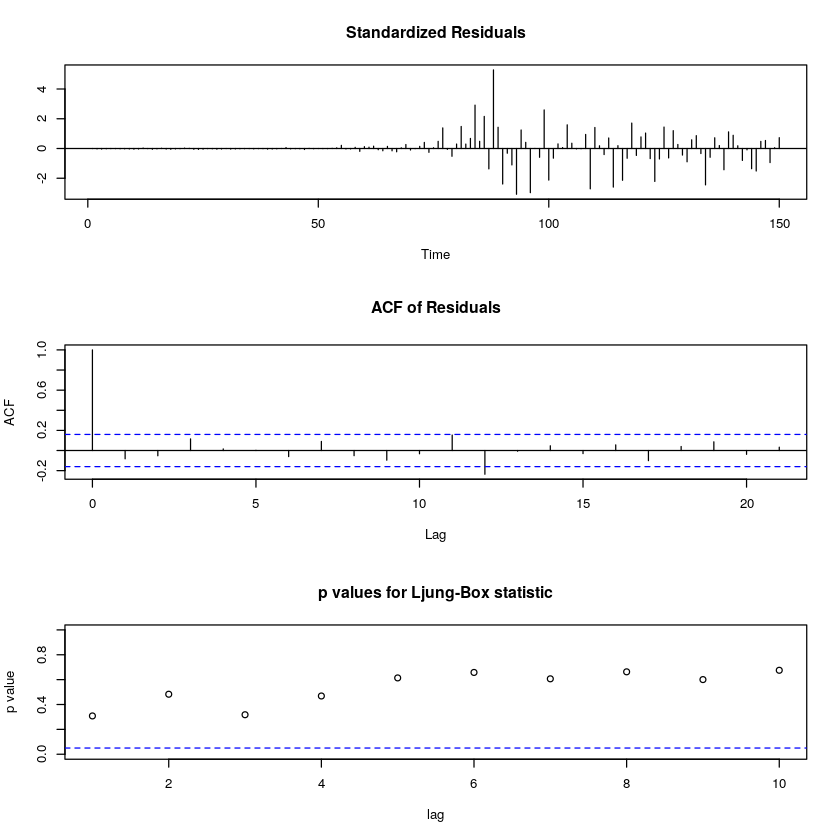

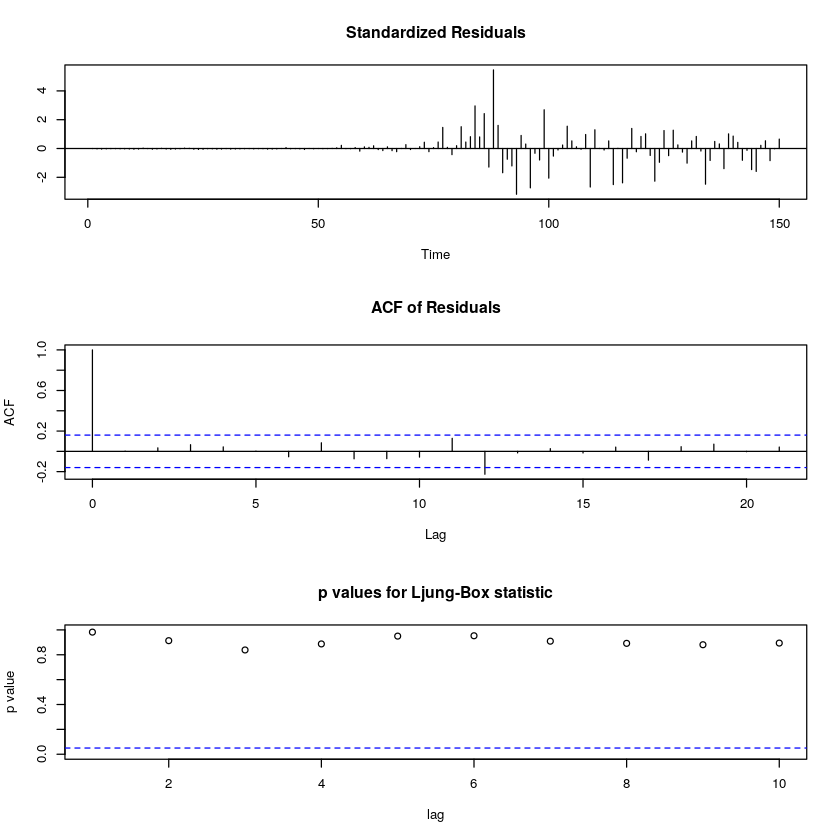

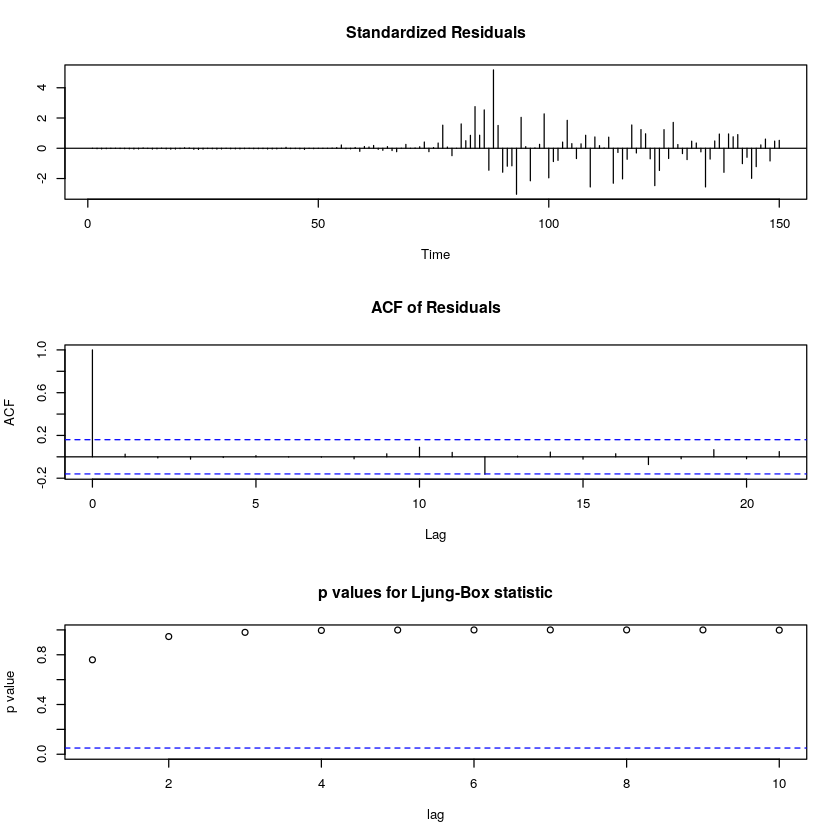

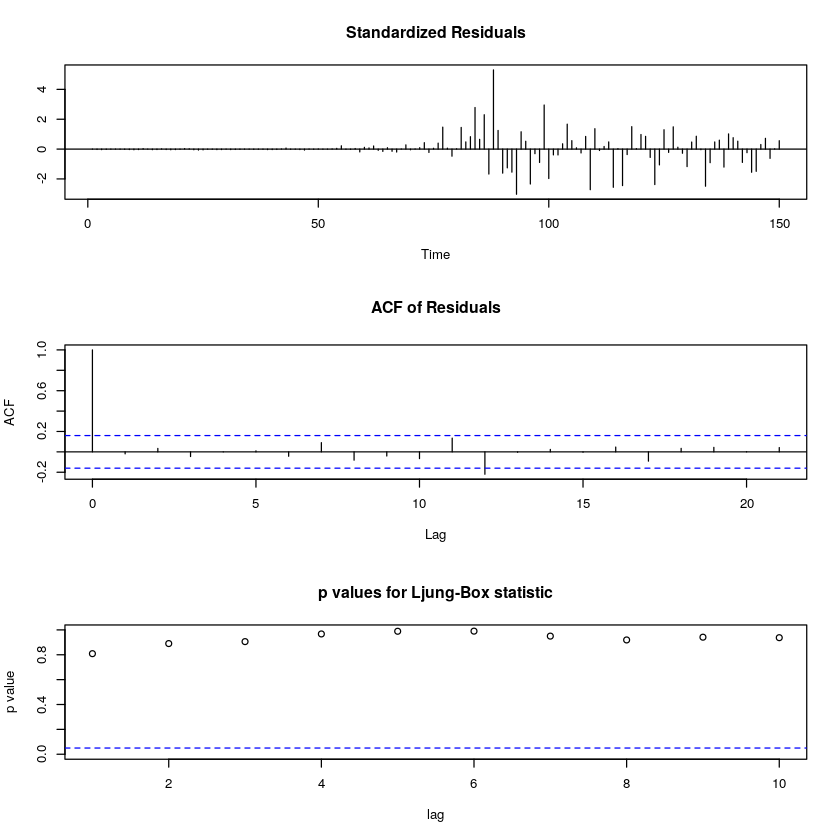

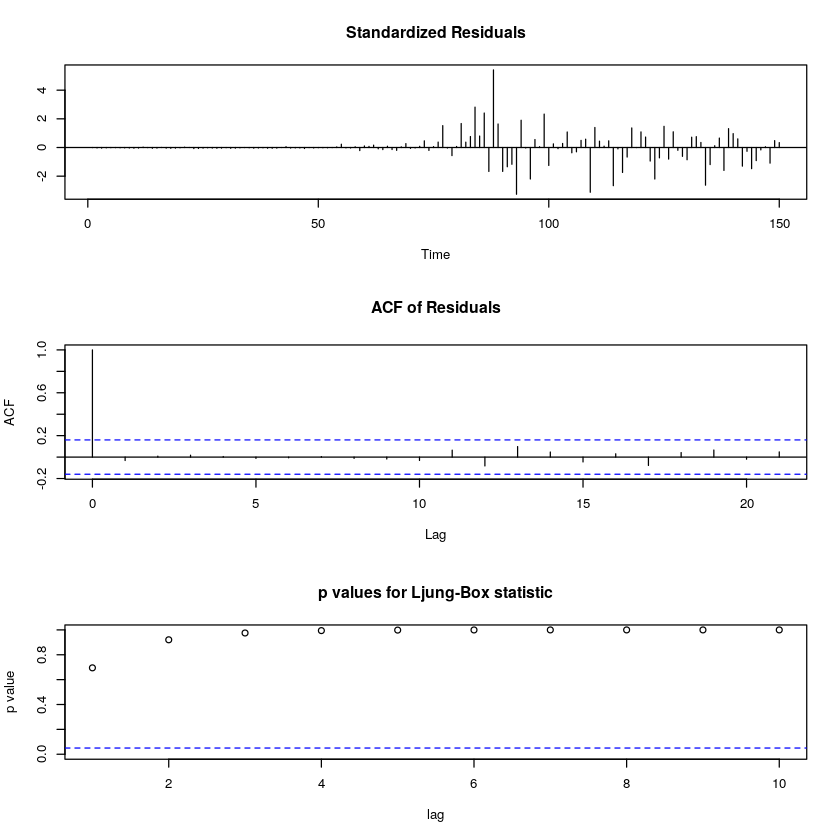

In [9]:
tsdiag(ar1)
tsdiag(ar2)
tsdiag(ar10)
tsdiag(ma2)
tsdiag(ma12)

[1] 1.006711

[1] -1.471287e-05

[1] 1.006711

[1] -3.962613e-05

[1] 1.006711

[1] -0.000278614

[1] 1.006711

[1] 2.74755e-05

[1] 1.006711

[1] -0.0006679564

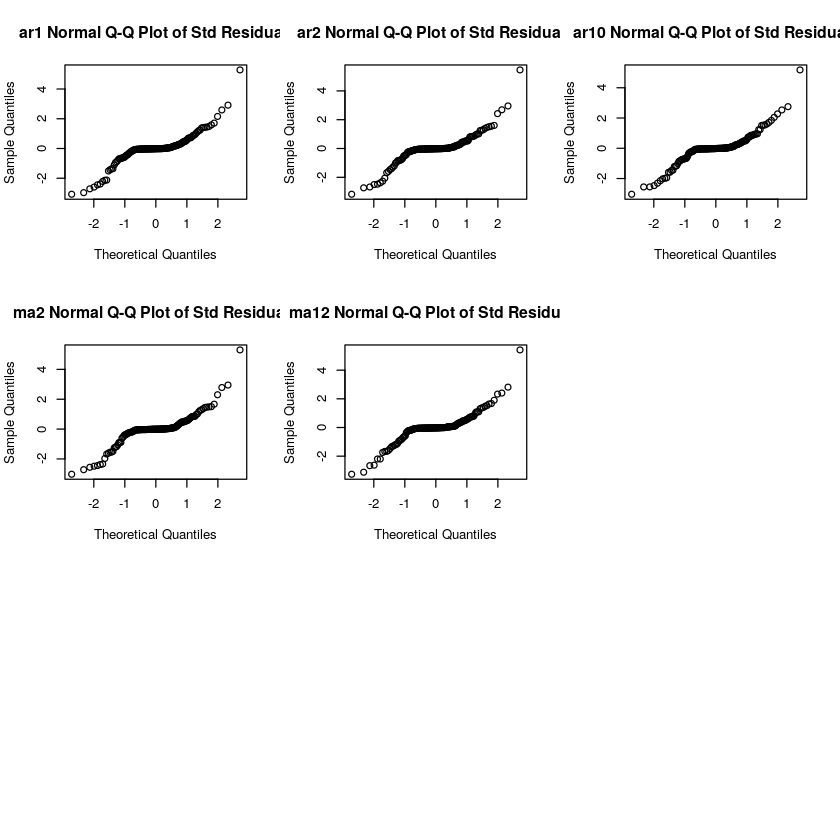

In [10]:
par(mfrow=c(3,3))
rs <- ar1$residuals
stdres <- rs/sqrt(ar1$sigma2) #standardized residuals
var(stdres)
mean(stdres)
qqnorm(stdres, main = " ar1 Normal Q-Q Plot of Std Residuals")

rs <- ar2$residuals
stdres <- rs/sqrt(ar2$sigma2) #standardized residuals
var(stdres)
mean(stdres)
qqnorm(stdres, main = "ar2 Normal Q-Q Plot of Std Residuals")

rs <- ar10$residuals
stdres <- rs/sqrt(ar10$sigma2) #standardized residuals
var(stdres)
mean(stdres)
qqnorm(stdres, main = "ar10 Normal Q-Q Plot of Std Residuals")

rs <- ma2$residuals
stdres <- rs/sqrt(ma2$sigma2) #standardized residuals
var(stdres)
mean(stdres)
qqnorm(stdres, main = "ma2 Normal Q-Q Plot of Std Residuals")

rs <- ma12$residuals
stdres <- rs/sqrt(ma12$sigma2) #standardized residuals
var(stdres)
mean(stdres)
qqnorm(stdres, main = "ma12 Normal Q-Q Plot of Std Residuals")

In [11]:
'ar1' 
ar1$aic
'ar2' 
ar2$aic
'ar10' 
ar10$aic
'ma2' 
ma2$aic
'ma12' 
ma12$aic


[1] "ar1"

[1] 1863.934

[1] "ar2"

[1] 1863.238

[1] "ar10"

[1] 1870.106

[1] "ma2"

[1] 1862.713

[1] "ma12"

[1] 1871.639

In [12]:
last_conf <- as.Date(confirmed$Date[length(confirmed$Date)])
new_dates <- seq.Date(from=last_conf +1, to=last_conf +20, by=1)
new_dates

[1] "2020-06-22" "2020-06-23" "2020-06-24" "2020-06-25" "2020-06-26"
 [6] "2020-06-27" "2020-06-28" "2020-06-29" "2020-06-30" "2020-07-01"
[11] "2020-07-02" "2020-07-03" "2020-07-04" "2020-07-05" "2020-07-06"
[16] "2020-07-07" "2020-07-08" "2020-07-09" "2020-07-10" "2020-07-11"

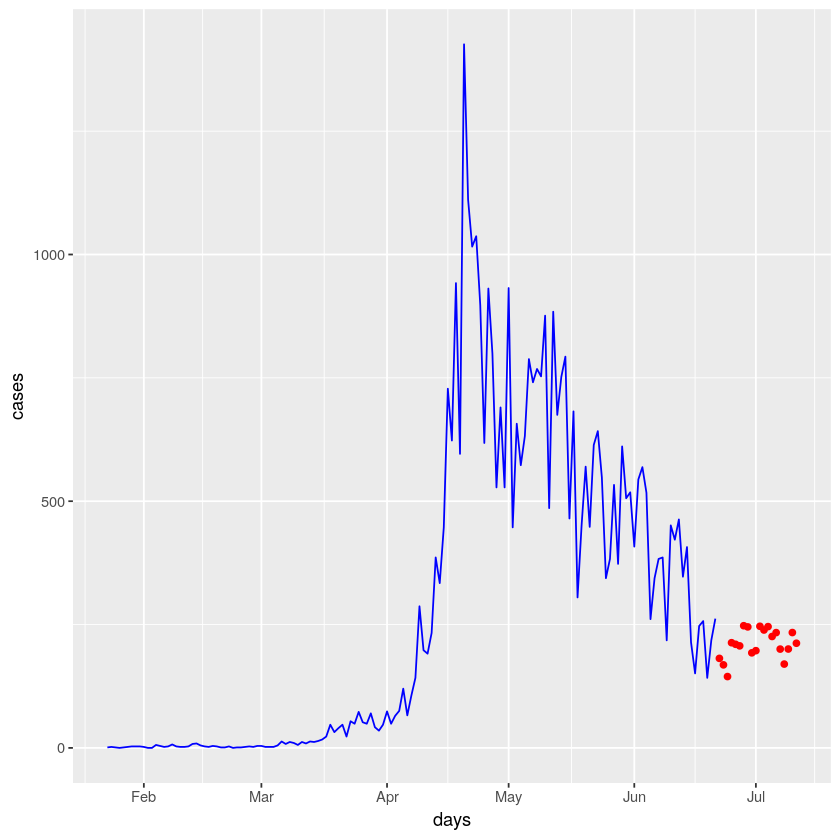

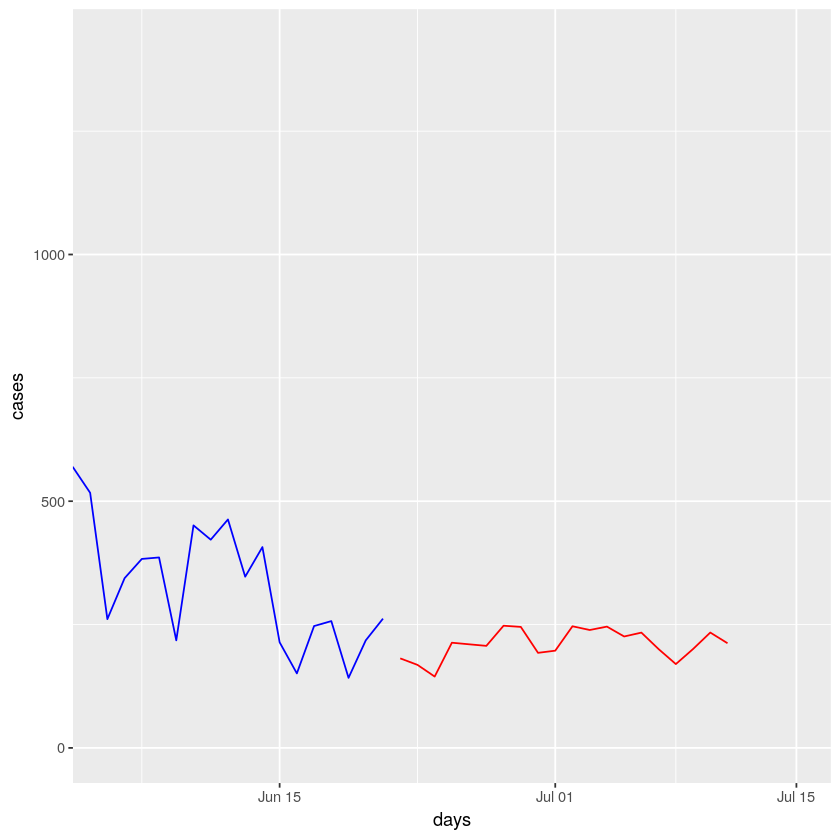

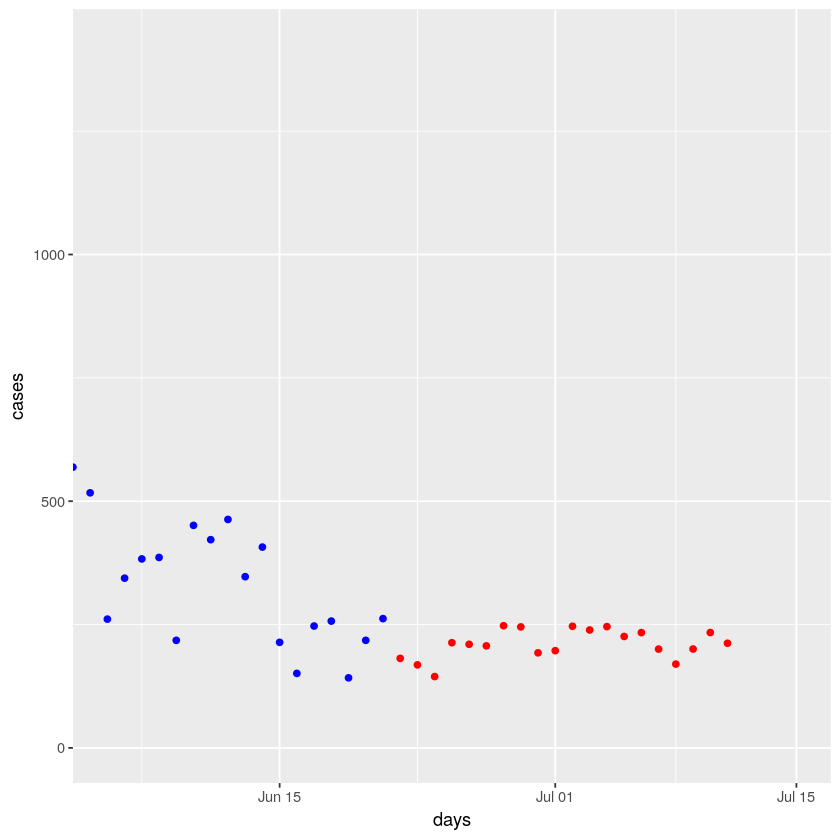

In [13]:
model <- arima(confirmed$Daily.Confirmed ,order=c(10,1,12))
fore <- predict(model, n.ahead=20)

prediction <-data.frame(Date=c(as.Date(confirmed$Date), new_dates), cases=c(confirmed$Daily.Confirmed, fore$pred))

ggplot() +
    geom_area(fill="lightblue", alpha=0.5) +
    geom_line(aes(x=prediction[1:151, ]$Date, y=prediction[1:151,]$cases), color="blue") +
    geom_point(aes(x=prediction[152:171, ]$Date, y=prediction[152:171,]$cases), color="red") +
    ylab("cases") +
    xlab("days") 

ggplot() +
    geom_area(fill="lightblue", alpha=0.5) +
    geom_line(aes(x=prediction[1:151, ]$Date, y=prediction[1:151,]$cases), color="blue") +
    geom_line(aes(x=prediction[152:171, ]$Date, y=prediction[152:171,]$cases), color="red") +
    ylab("cases") +
    xlab("days") +
    coord_cartesian(xlim=c(as.Date('2020-06-5'), as.Date('2020-07-15'))) 

ggplot() +
    geom_area(fill="lightblue", alpha=0.5) +
    geom_point(aes(x=prediction[1:151, ]$Date, y=prediction[1:151,]$cases), color="blue") +
    geom_point(aes(x=prediction[152:171, ]$Date, y=prediction[152:171,]$cases), color="red") +
    ylab("cases") +
    xlab("days") +
    coord_cartesian(xlim=c(as.Date('2020-06-5'), as.Date('2020-07-15'))) 


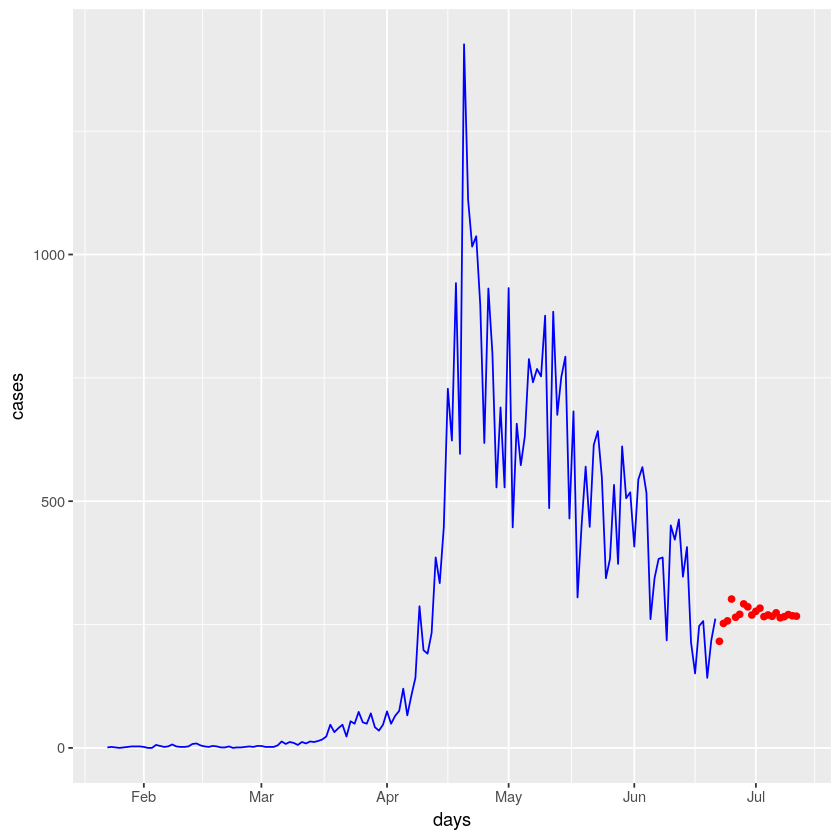

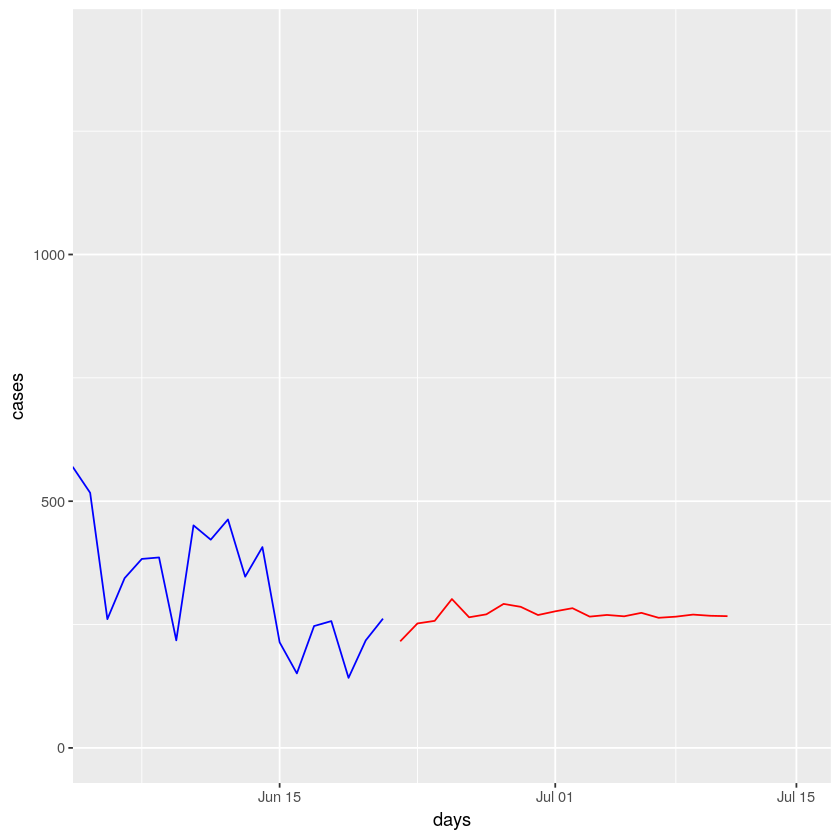

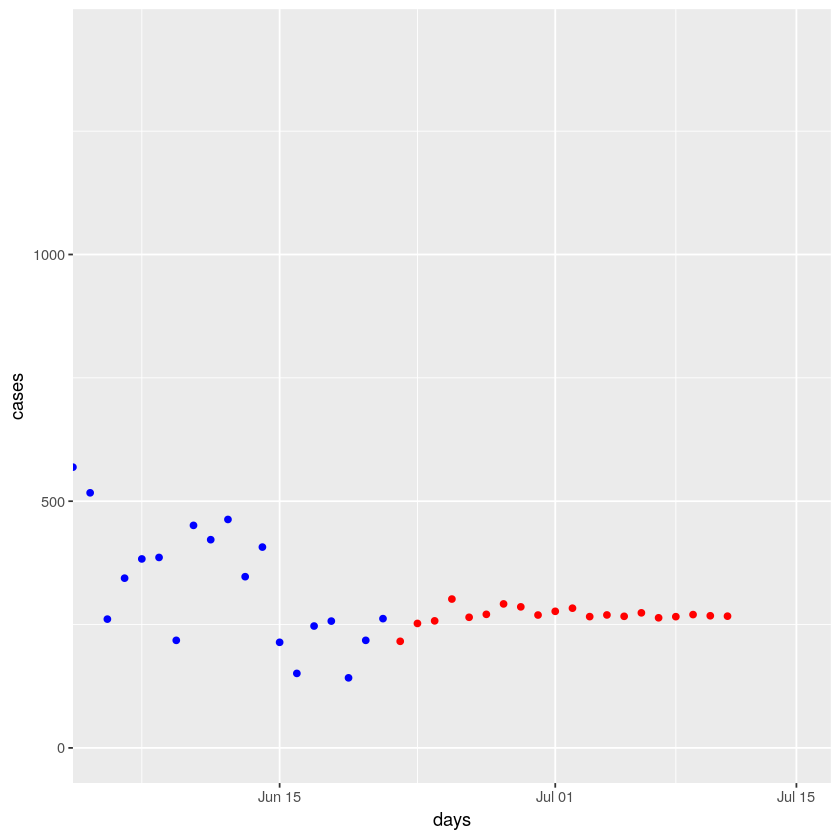

In [14]:
model<- arima(confirmed$Daily.Confirmed ,order=c(10,1,0))

fore <- predict(model, n.ahead=20) 

prediction <-data.frame(Date=c(as.Date(confirmed$Date), new_dates), cases=c(confirmed$Daily.Confirmed, fore$pred))

ggplot() +
    geom_area(fill="lightblue", alpha=0.5) +
    geom_line(aes(x=prediction[1:151, ]$Date, y=prediction[1:151,]$cases), color="blue") +
    geom_point(aes(x=prediction[152:171, ]$Date, y=prediction[152:171,]$cases), color="red") +
    ylab("cases") +
    xlab("days") 

ggplot() +
    geom_area(fill="lightblue", alpha=0.5) +
    geom_line(aes(x=prediction[1:151, ]$Date, y=prediction[1:151,]$cases), color="blue") +
    geom_line(aes(x=prediction[152:171, ]$Date, y=prediction[152:171,]$cases), color="red") +
    ylab("cases") +
    xlab("days") +
    coord_cartesian(xlim=c(as.Date('2020-06-5'), as.Date('2020-07-15'))) 

ggplot() +
    geom_area(fill="lightblue", alpha=0.5) +
    geom_point(aes(x=prediction[1:151, ]$Date, y=prediction[1:151,]$cases), color="blue") +
    geom_point(aes(x=prediction[152:171, ]$Date, y=prediction[152:171,]$cases), color="red") +
    ylab("cases") +
    xlab("days") +
    coord_cartesian(xlim=c(as.Date('2020-06-5'), as.Date('2020-07-15'))) 

### ANOVA

In [15]:
movies <- read.csv('imdb_1972-2019.csv')
names(movies)

[1] "Id"                 "Title"              "Year"              
 [4] "Rating"             "Metascore"          "Votes"             
 [7] "Description"        "Genre"              "Runtime..Minutes." 
[10] "Revenue..Millions." "Actors"             "Director"

In [16]:
dir_list <- c('Roman Polanski', 'Wes Anderson', 'Quentin Tarantino', 'Roland Emmerich', 'Christopher Nolan')

In [17]:
new_dataset <- movies %>% rename(Runtime = 'Runtime..Minutes.', Revenue = 'Revenue..Millions.') %>% 
    group_by(Director) %>% 
    summarise( num_of_movies = n(), total_revenue = sum(Revenue), total_votes=sum(Votes), mean_rating=mean(Rating)) %>% 
    mutate(mean_rev_per_movie=total_revenue/num_of_movies) %>%
    filter(num_of_movies ==9) %>% 
    filter(str_trim(Director) %in% dir_list) 

new_dataset <- new_dataset[order(new_dataset$total_revenue), ]
new_dataset

Director,num_of_movies,total_revenue,total_votes,mean_rating,mean_rev_per_movie
Roman Polanski,9,120.25,1482949,7.344444,13.36111
Wes Anderson,9,263.57,2082129,7.600000,29.28556
Quentin Tarantino,9,759.58,7711568,8.122222,84.39778
Roland Emmerich,9,1002.44,1829832,6.088889,111.38222
Christopher Nolan,9,1816.84,9755898,8.211111,201.87111


In [18]:
all_dir <- movies %>% filter(str_trim(Director) %in% dir_list) %>%
    select(Director, Rating, Revenue..Millions.)
head(all_dir)

Director,Rating,Revenue..Millions.
Quentin Tarantino,7.8,135.37
Wes Anderson,7.9,32.02
Christopher Nolan,7.9,188.37
Roland Emmerich,5.3,103.14
Quentin Tarantino,7.8,54.12
Wes Anderson,8.1,59.10


In [19]:
all_ratings <- list()
for (dir in dir_list) {
    all_ratings <- c(all_ratings, list((all_dir %>% filter(str_trim(Director) == dir) %>% select(Rating))$Rating) )

}
all_ratings[4] <- list(unlist(all_ratings[4])[-length(unlist(all_ratings[4]))])
all_ratings

[[1]]
[1] 7.2 7.2 6.8 8.5 6.7 7.3 6.9 7.3 8.2

[[2]]
[1] 7.9 8.1 7.8 7.8 7.2 7.3 7.6 7.7 7.0

[[3]]
[1] 7.8 7.8 8.4 8.3 8.0 8.1 7.5 8.9 8.3

[[4]]
[1] 5.3 6.9 5.8 5.1 6.4 5.4 7.0 7.1 6.0

[[5]]
[1] 7.9 8.4 8.8 9.0 8.5 8.2 7.2 8.4 7.5

In [20]:
bartlett.test(all_ratings)

fact <- factor(as.numeric(factor(rep(new_dataset$total_revenue, c(9,9,9,9, 9)))))
fact


	Bartlett test of homogeneity of variances

data:  all_ratings
Bartlett's K-squared = 5.5617, df = 4, p-value = 0.2344


[1] 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 4 4 4 4 4 4 4 4 4 5 5
[39] 5 5 5 5 5 5 5
Levels: 1 2 3 4 5

In [21]:
mydata<-data.frame(all_ratings=unlist(all_ratings), revenue=fact)

levels(mydata$revenue)

[1] "1" "2" "3" "4" "5"

In [22]:
a<-aov(formula=all_ratings~revenue,data=mydata)

In [23]:
summary(a)

            Df Sum Sq Mean Sq F value   Pr(>F)    
revenue      4  25.68   6.421   19.85 4.52e-09 ***
Residuals   40  12.94   0.323                     
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

#### two way anova

In [24]:
names(movies)

[1] "Id"                 "Title"              "Year"              
 [4] "Rating"             "Metascore"          "Votes"             
 [7] "Description"        "Genre"              "Runtime..Minutes." 
[10] "Revenue..Millions." "Actors"             "Director"

In [25]:
new_ds <- movies %>% rename(Runtime = 'Runtime..Minutes.', Revenue = 'Revenue..Millions.') %>% select(Year, Runtime, Revenue)

yr <- new_ds %>% filter(Year <2000, Runtime <120) 
yR <- new_ds %>% filter(Year <2000, Runtime >=120) 
Yr <- new_ds %>% filter(Year >=2000, Runtime <120)
YR <- new_ds %>% filter(Year >=2000, Runtime >=120) 

In [49]:
sample1 <- yr[sample(nrow(yr), 10), ]
sample2 <- yR[sample(nrow(yR), 10), ]
sample3 <- Yr[sample(nrow(Yr), 10), ]
sample4 <- YR[sample(nrow(YR), 10), ]

all_revenues<-list(sample1$Revenue, sample2$Revenue, sample3$Revenue, sample4$Revenue)
bartlett.test(all_revenues)
df <- data.frame(year=factor(c(rep(1, 20), rep(2, 20))), 
           runtime=factor(c(rep(1, 10), rep(2, 10), rep(1, 10), rep(2, 10)))
                 , revenue=c(sample1$Revenue, sample2$Revenue, sample3$Revenue, sample4$Revenue))



	Bartlett test of homogeneity of variances

data:  all_revenues
Bartlett's K-squared = 30.279, df = 3, p-value = 1.205e-06


In [27]:
df <- data.frame(year=factor(c(rep(1, 20), rep(2, 20))), 
           runtime=factor(c(rep(1, 10), rep(2, 10), rep(1, 10), rep(2, 10)))
                 , revenue=c(sample1$Revenue, sample2$Revenue, sample3$Revenue, sample4$Revenue))

In [28]:
levels(df$year) 
levels(df$runtime)

[1] "1" "2"

[1] "1" "2"

In [29]:
a<-aov(formula=revenue~ year*runtime,data=df)

In [30]:
summary(a)

             Df Sum Sq Mean Sq F value Pr(>F)  
year          1   6391    6391   0.595 0.4454  
runtime       1  77041   77041   7.175 0.0111 *
year:runtime  1    818     818   0.076 0.7841  
Residuals    36 386527   10737                 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

### Linear Regression

In [31]:
salaries <- read.csv('FacultySalaries.csv')
salaries$University <- as.numeric(factor(salaries$University))
head(salaries)

University,CIC.institutions,average.salary,full.prof.salary,assoc.prof.salary,asst.prof.salary
12,0,64.47,83.0,57.5,46.1
46,0,59.20,78.9,49.7,42.5
48,0,58.77,75.4,51.4,43.8
39,0,55.94,70.2,50.8,41.5
4,0,75.54,93.3,70.0,56.4
5,0,63.01,79.3,55.0,49.4


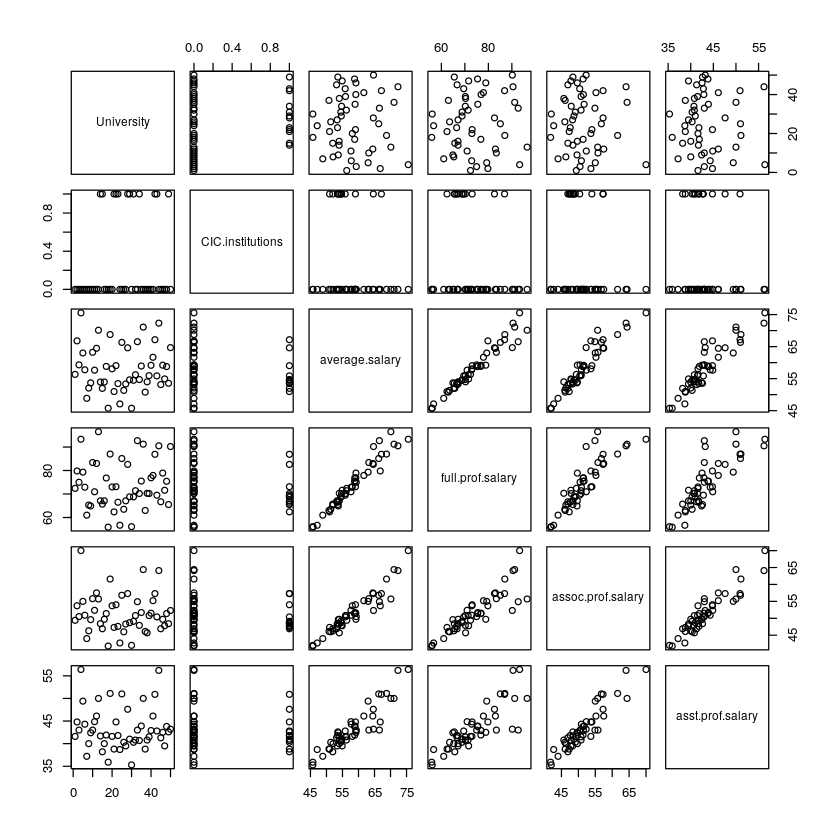

In [32]:
pairs(salaries)

In [33]:
model <-lm(asst.prof.salary~average.salary,data=salaries)
summary(model)

b0 <- model$coefficients[1]
b1 <- model$coefficients[2]


Call:
lm(formula = asst.prof.salary ~ average.salary, data = salaries)

Residuals:
    Min      1Q  Median      3Q     Max 
-5.3336 -0.9589 -0.0365  1.1614  4.3478 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)     7.97309    2.24062   3.558 0.000852 ***
average.salary  0.60665    0.03823  15.867  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.867 on 48 degrees of freedom
Multiple R-squared:  0.8399,	Adjusted R-squared:  0.8365 
F-statistic: 251.8 on 1 and 48 DF,  p-value: < 2.2e-16


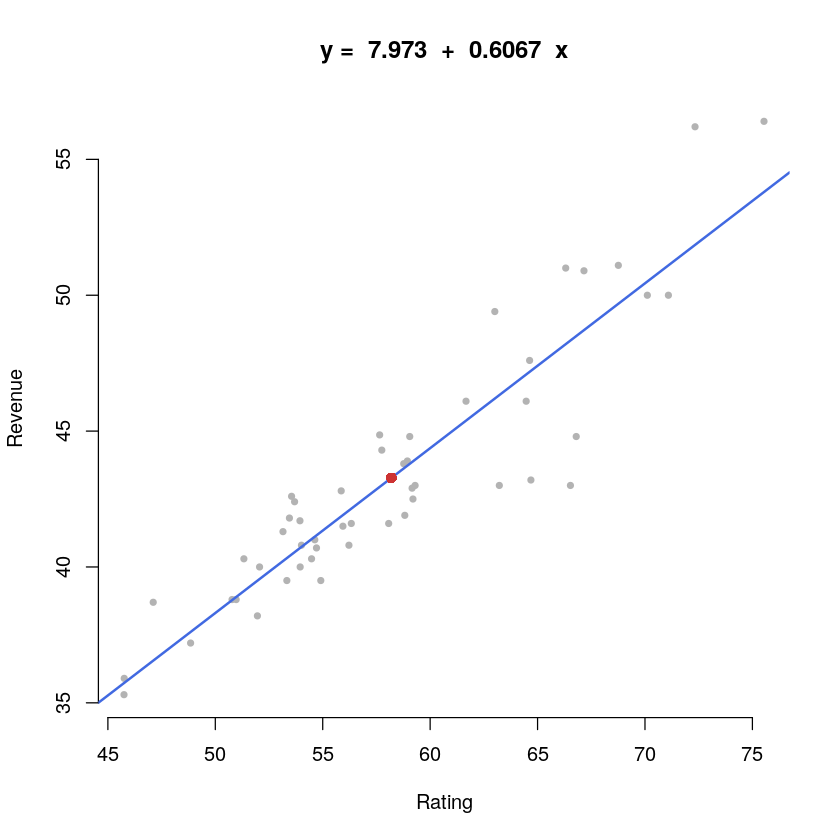

In [34]:
plot(salaries$average.salary, salaries$asst.prof.salary,
     xlab = "Rating",
     ylab = "Revenue",
     col = "grey70",
     pch = 20,
     bty="n",
     main = paste("y = ", format(b0, digits = 4), " + ",
                  format(b1, digits = 4), " x"))
abline(a = b0, b = b1, col = "royalblue", lwd = 2)

points(mean(salaries$average.salary), mean(salaries$asst.prof.salary),
       pch = 16,
       col = "brown3",
       cex = 1.2)

In [47]:
print(anova(model))
shapiro.test(residuals(model))

Analysis of Variance Table

Response: asst.prof.salary
               Df Sum Sq Mean Sq F value    Pr(>F)    
average.salary  1 877.55  877.55  251.76 < 2.2e-16 ***
Residuals      48 167.31    3.49                      
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1



	Shapiro-Wilk normality test

data:  residuals(model)
W = 0.97456, p-value = 0.351


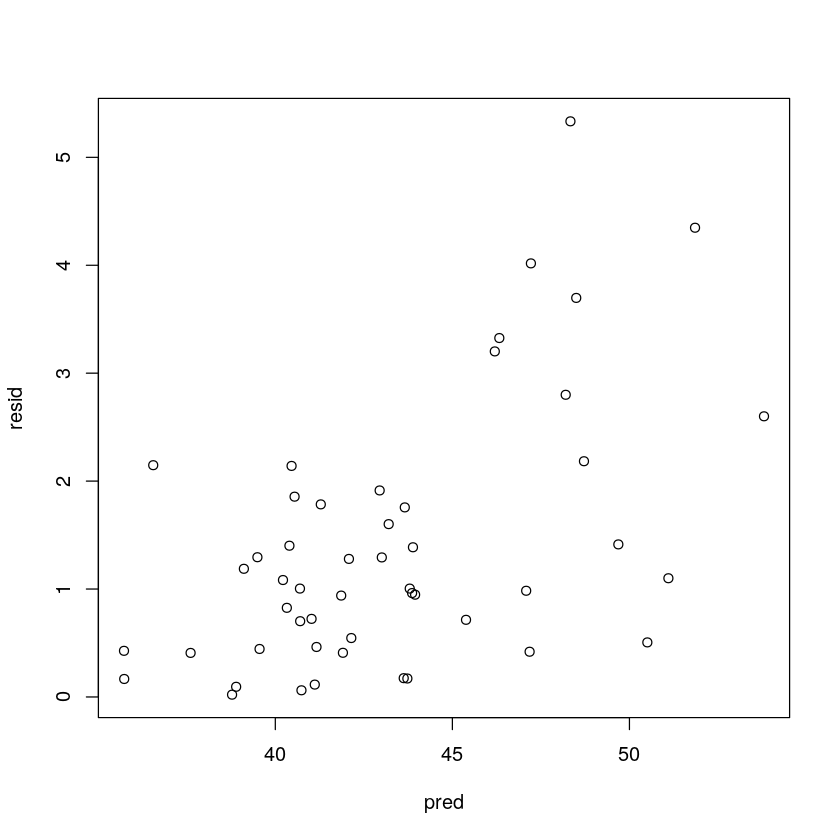

In [36]:
resid <- abs(residuals(model)) 
pred<-predict(model)
plot(pred,resid)

In [37]:
model2 <-lm(asst.prof.salary~ University,data=salaries)
summary(model)

b0 <- model2$coefficients[1]
b1 <- model2$coefficients[2]


Call:
lm(formula = asst.prof.salary ~ average.salary, data = salaries)

Residuals:
    Min      1Q  Median      3Q     Max 
-5.3336 -0.9589 -0.0365  1.1614  4.3478 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)     7.97309    2.24062   3.558 0.000852 ***
average.salary  0.60665    0.03823  15.867  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.867 on 48 degrees of freedom
Multiple R-squared:  0.8399,	Adjusted R-squared:  0.8365 
F-statistic: 251.8 on 1 and 48 DF,  p-value: < 2.2e-16


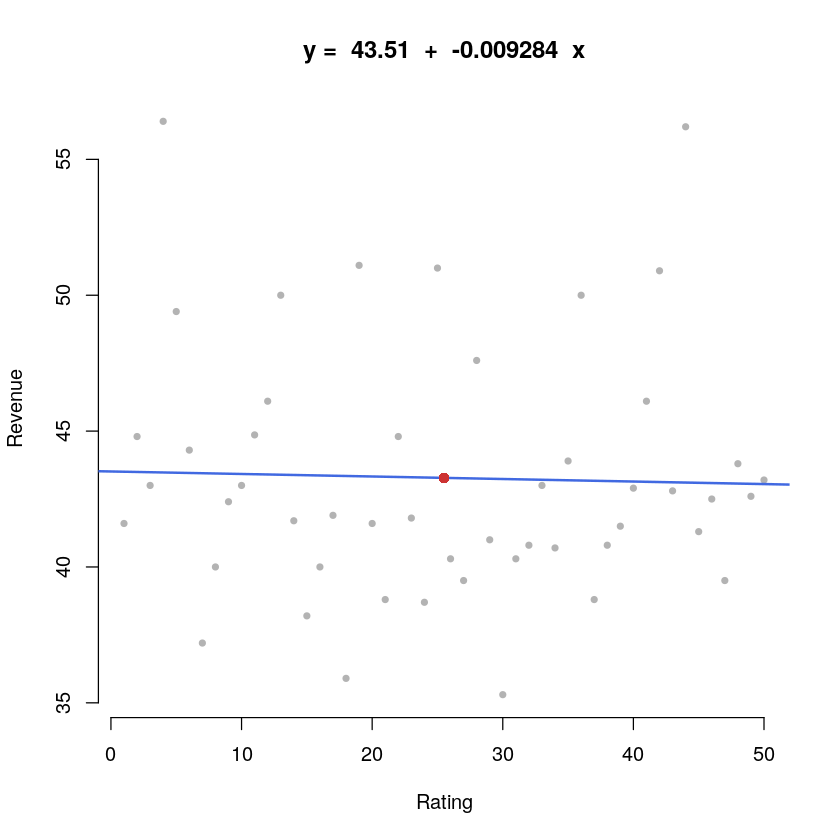

In [38]:
plot(salaries$University, salaries$asst.prof.salary,
     xlab = "Rating",
     ylab = "Revenue",
     col = "grey70",
     pch = 20,
     bty="n",
     main = paste("y = ", format(b0, digits = 4), " + ",
                  format(b1, digits = 4), " x"))
abline(a = b0, b = b1, col = "royalblue", lwd = 2)

points(mean(salaries$University), mean(salaries$asst.prof.salary),
       pch = 16,
       col = "brown3",
       cex = 1.2)

In [46]:
print(anova(model2))
shapiro.test(residuals(model2))

Analysis of Variance Table

Response: asst.prof.salary
           Df Sum Sq Mean Sq F value Pr(>F)
University  1    0.9  0.8975  0.0413 0.8399
Residuals  48 1044.0 21.7492               



	Shapiro-Wilk normality test

data:  residuals(model2)
W = 0.91664, p-value = 0.001787


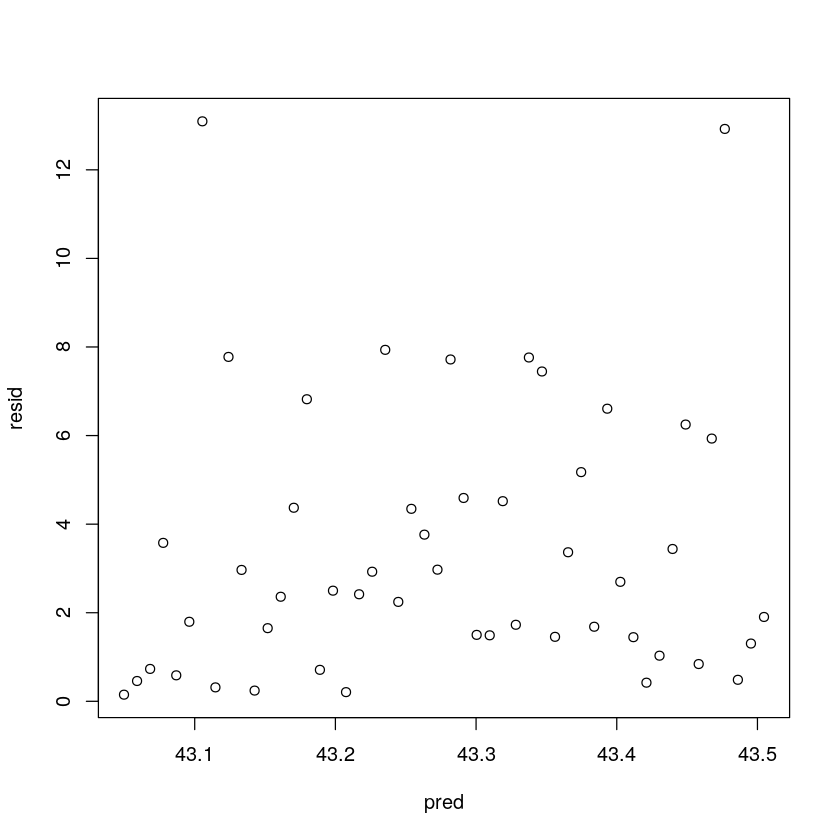

In [40]:
resid <- abs(residuals(model2)) 
pred<-predict(model2)
plot(pred,resid)

In [41]:
model3 <-lm(asst.prof.salary~ average.salary + full.prof.salary + assoc.prof.salary, data=salaries)
summary(model3)

b0 <- model3$coefficients[1]
b1 <- model3$coefficients[2]


Call:
lm(formula = asst.prof.salary ~ average.salary + full.prof.salary + 
    assoc.prof.salary, data = salaries)

Residuals:
    Min      1Q  Median      3Q     Max 
-5.2228 -0.8060 -0.0115  0.8387  2.8495 

Coefficients:
                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)         3.8351     2.0403   1.880 0.066502 .  
average.salary      0.9865     0.2530   3.899 0.000312 ***
full.prof.salary   -0.3620     0.1141  -3.172 0.002695 ** 
assoc.prof.salary   0.1709     0.1525   1.121 0.268209    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.541 on 46 degrees of freedom
Multiple R-squared:  0.8954,	Adjusted R-squared:  0.8886 
F-statistic: 131.3 on 3 and 46 DF,  p-value: < 2.2e-16


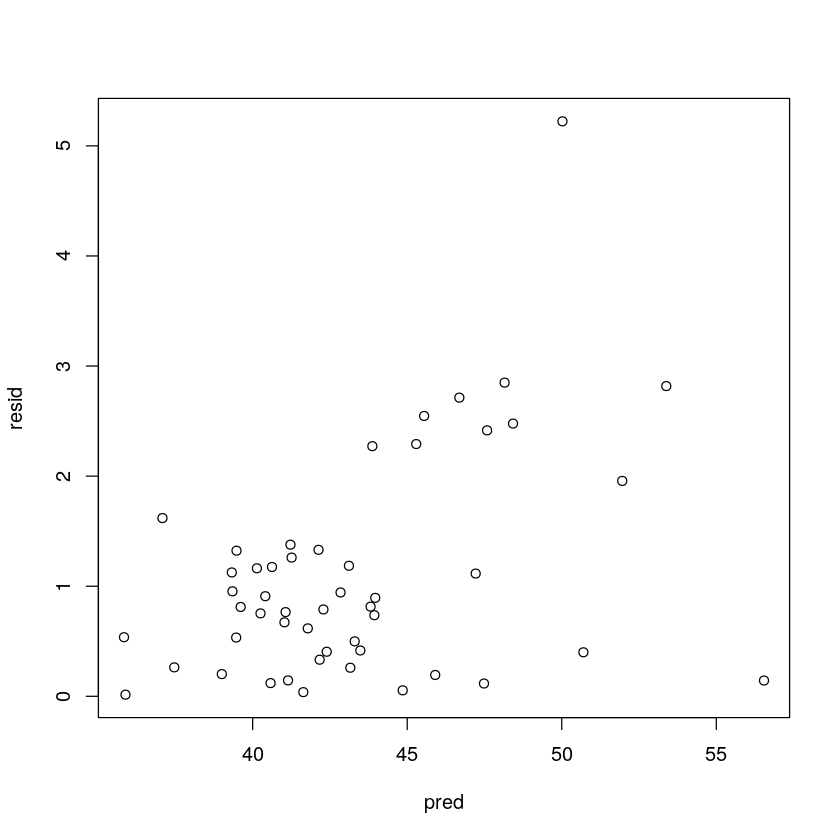

In [42]:
resid <- abs(residuals(model3)) 
pred<-predict(model3)
plot(pred,resid)

In [45]:
print(anova(model3))
shapiro.test(residuals(model3))

Analysis of Variance Table

Response: asst.prof.salary
                  Df Sum Sq Mean Sq  F value    Pr(>F)    
average.salary     1 877.55  877.55 369.3523 < 2.2e-16 ***
full.prof.salary   1  55.03   55.03  23.1638 1.642e-05 ***
assoc.prof.salary  1   2.98    2.98   1.2561    0.2682    
Residuals         46 109.29    2.38                       
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1



	Shapiro-Wilk normality test

data:  residuals(model3)
W = 0.95394, p-value = 0.04964
